In [93]:
#Import neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import Imputer


In [94]:
#Import the Data Set
company=pd.read_csv(r'https://raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv')
company.head(2)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0


In [13]:
#NO. of NaN/0 Values 
company.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [ ]:
#Clean the Data

'''
#Columns to be Cleaned:
1. Company - Empty entries + Duplicate Names
2. Age - 0's and Empty entries
3. Salary - Empty entries
4. Place - Empty entries
5. Country - No Change required 
6. Gender - No change required
   0's - Females / 1's - Males
'''

In [112]:
#Altering the Company Names 
company.columns.unique()
company['Company'].unique()
company['Company']=company['Company'].replace("Congnizant","CTS")

In [113]:
company['Company']=company['Company'].replace("Infosys Pvt Lmt","Infosys")
company['Company']=company['Company'].replace("Tata Consultancy Services","TCS")
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [114]:
#Altering the Empty values in Company Column - Replacing it with 'Others'
company['Company']=company['Company'].replace(np.NaN,"Others")

In [115]:
company.isna().sum()

Company     0
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [ ]:
#Altering the Age Column
#0's are there[Not a valid case so deleting] , Empty values are there[Imputing with Mean]


In [116]:
company.shape

(148, 6)

In [117]:
#To remove rows with 0 entries
company.drop(company[company['Age']==0].index,inplace=True)


In [118]:
company.shape

(142, 6)

In [119]:
#To impute with Mean value for Missing places in Age column
company['Age']=company['Age'].fillna(company['Age'].mean())
company.isna().sum()

Company     0
Age         0
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [120]:
#Altering 'Salary' column - Imputing with mean
company['Salary']=company['Salary'].fillna(company['Salary'].mean())
company.isna().sum()

Company     0
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

In [ ]:
#Altering the Place column - Empty entries to 'Others'

In [121]:
company['Place']=company['Place'].replace(np.NaN,"Others")

In [126]:
company.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [151]:
company.dtypes
#company['Salary']=company['Salary'].astype('int64')
#company['Salary'].unique()

Company    object
Age         int64
Salary      int64
Place      object
Country    object
Gender      int64
dtype: object

Text(0.5, 1.0, 'Salary Graph')

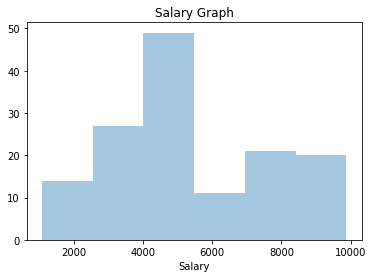

In [184]:
#plt.figure(figsize=(10,6))
#plt.title("Age Vs Salary")
#sns.barplot(x=company['Age'],y=company['Salary'])
#plt.show()

### Not able to use Bar Plot###


sns.distplot(company['Salary'],kde=False)
plt.title("Salary Graph")
## Average Salary Received is - 5000

Text(0.5, 1.0, 'Age Group of Employers')

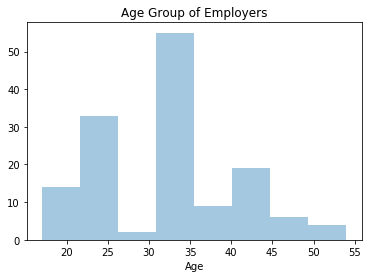

In [177]:
sns.distplot(company['Age'],kde=False)
plt.title("Age Group of Employers")
## Maximum Age group Employed are from 30 - 35

Text(0.5, 1.0, 'Age Vs Salary')

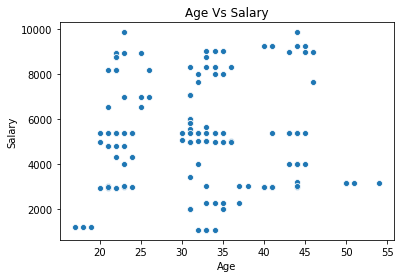

In [196]:
sns.scatterplot(x=company['Age'],y=company['Salary'])
plt.title("Age Vs Salary")


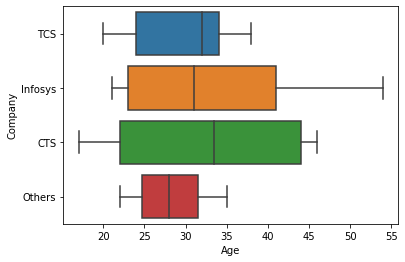

In [256]:
sns.boxplot(x=company['Age'],y=company['Company'])

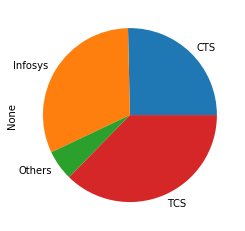

In [261]:
company.groupby('Company').size().plot(kind='pie')
##TCS holds the max. no. ppl working & CTS is the minimum.

In [198]:
#1. Total no. of ppl working across company
company['Company'].value_counts()
## TCS holds the max. no. ppl working & CTS is the minimum.

TCS        53
Infosys    45
CTS        36
Others      8
Name: Company, dtype: int64

In [201]:
#2.Highest Salary Company wise
company.groupby('Company')['Salary'].max()
## CTS is paying highest Salary
## Infosys is paying the lowest Salary

Company
CTS        9876
Infosys    8943
Others     8943
TCS        9024
Name: Salary, dtype: int64

In [217]:
#3.No. of ppl genderwise split across companies
#0's - Female, 1's - Male
company.groupby(['Company','Gender'])['Gender'].count()

Company  Gender
CTS      0         28
         1          8
Infosys  0         38
         1          7
Others   0          7
         1          1
TCS      0         37
         1         16
Name: Gender, dtype: int64

In [247]:
#4. To Find whether M / F is employed max
c=company.groupby(['Gender','Company']).agg({'Gender':'count'})
c
## Females are employed at the Max

Gender
Gender Company        
0      CTS          28
       Infosys      38
       Others        7
       TCS          37
1      CTS           8
       Infosys       7
       Others        1
       TCS          16